# Exploratory Data Analysis (EDA)

## Flows:

### 1. DATA PROFILES

### 2. DATA RELATIONSHIPS

### 3. IDENTIFYING AND CREATING FEATURES

###


In [1]:
# First, import the relevant modules and packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#suppress future warnings
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
#warnings.simplefilter(action='ignore', category=UserWarning)

# Show plots inline
%matplotlib inline

In [2]:
# Import Austin_TX_House_Listings_data_v1.csv & us_income_zipcode.csv
df = pd.read_csv('../03_processed_data/oil_production_wrangled_data.csv', low_memory=False)

In [3]:
df.shape

(2376, 6)

In [4]:
df.head()

,country_name,type,product,flow,year,value
0,Australia,Balance,Crude oil,Industrial Production,2021,18029.678
1,Austria,Balance,Crude oil,Industrial Production,2021,561.852
2,Belgium,Balance,Crude oil,Industrial Production,2021,0.000
3,Canada,Balance,Crude oil,Industrial Production,2021,266630.180
4,Chile,Balance,Crude oil,Industrial Production,2021,340.997


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  2376 non-null   object 
 1   type          2376 non-null   object 
 2   product       2376 non-null   object 
 3   flow          2376 non-null   object 
 4   year          2376 non-null   int64  
 5   value         2376 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 111.5+ KB


In [6]:
df['year'] = df['year'].astype('object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  2376 non-null   object 
 1   type          2376 non-null   object 
 2   product       2376 non-null   object 
 3   flow          2376 non-null   object 
 4   year          2376 non-null   object 
 5   value         2376 non-null   float64
dtypes: float64(1), object(5)
memory usage: 111.5+ KB


In [8]:
df.describe().round(2)

,value
count,2376.00
mean,6298.35
std,36784.31
min,-2442.00
25%,48.56
50%,462.11
75%,2594.84
max,790672.41


In [30]:
df.nunique()

country_name      36
type               1
product           11
flow               4
year               3
value           1808
dtype: int64

In [32]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}\n")

Unique values in column 'country_name': ['Australia' 'Austria' 'Belgium' 'Canada' 'Chile' 'Czech Republic'
 'Denmark' 'Estonia' 'Finland' 'France' 'Germany' 'Greece' 'Hungary'
 'Iceland' 'Ireland' 'Israel' 'Italy' 'Japan' 'South Korea' 'Latvia'
 'Lithuania' 'Luxembourg' 'Mexico' 'Netherlands' 'Norway' 'New Zealand'
 'Poland' 'Portugal' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Türkiye' 'United Kingdom' 'United States']

Unique values in column 'type': ['Balance']

Unique values in column 'product': ['Crude oil' 'Liquified Petroleum Gas' 'Naphtha'
 'Total gas oil production' 'Total kerosene production'
 'Gasoline and diesel' 'Residual fuel oil' 'Other oil products'
 'Total oil products production' 'Total oil production'
 'Middle distillates']

Unique values in column 'flow': ['Industrial Production' 'Net Deliveries' 'Consumption Pattern'
 'Storage Channelization']

Unique values in column 'year': [2021 2022 2023]

Unique values in column 'value': [ 1.8029678e+04  5.6185200e

## It looks like we don't need the 'type' feature / column since it is the same for all countries

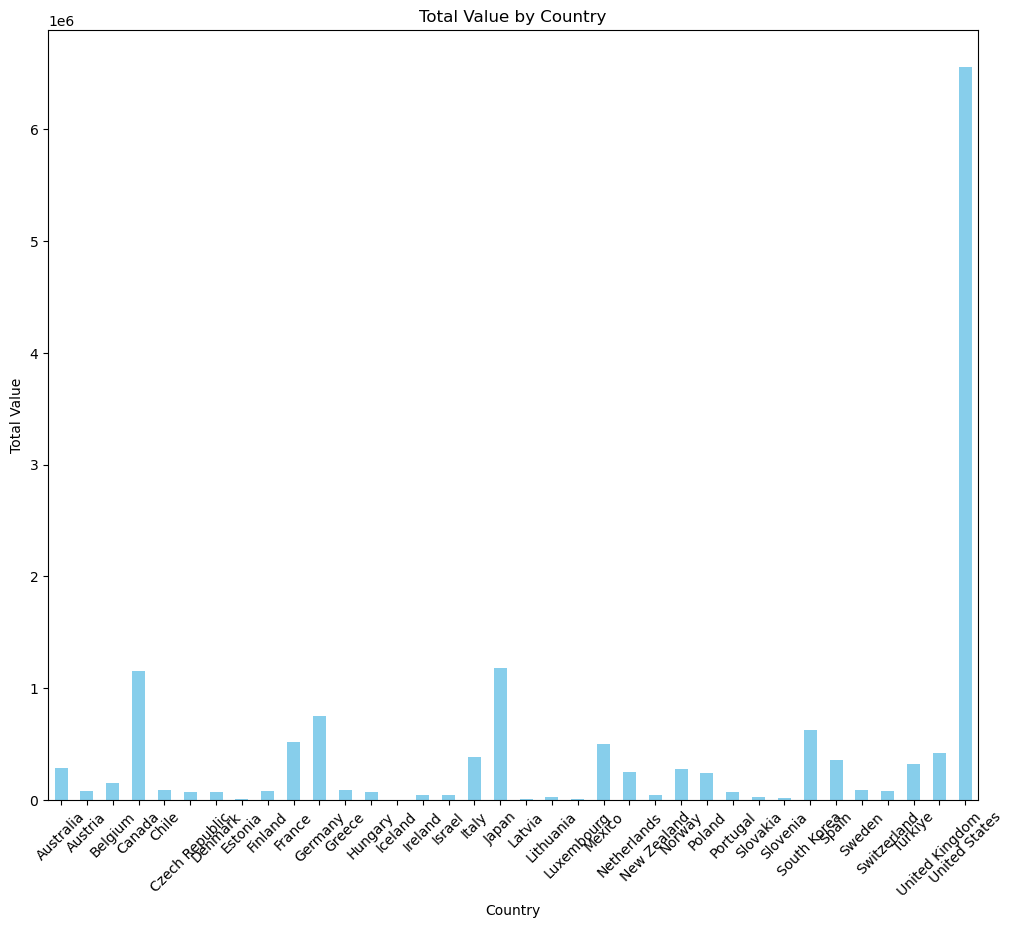

In [21]:
#  Bar chart showing the sum of 'value' per 'country_name'
plt.figure(figsize=(12, 10))
country_value = df.groupby('country_name')['value'].sum()  # Or use .mean() to show the average
country_value.plot(kind='bar', color='skyblue')
plt.title('Total Value by Country')
plt.xlabel('Country')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.show()

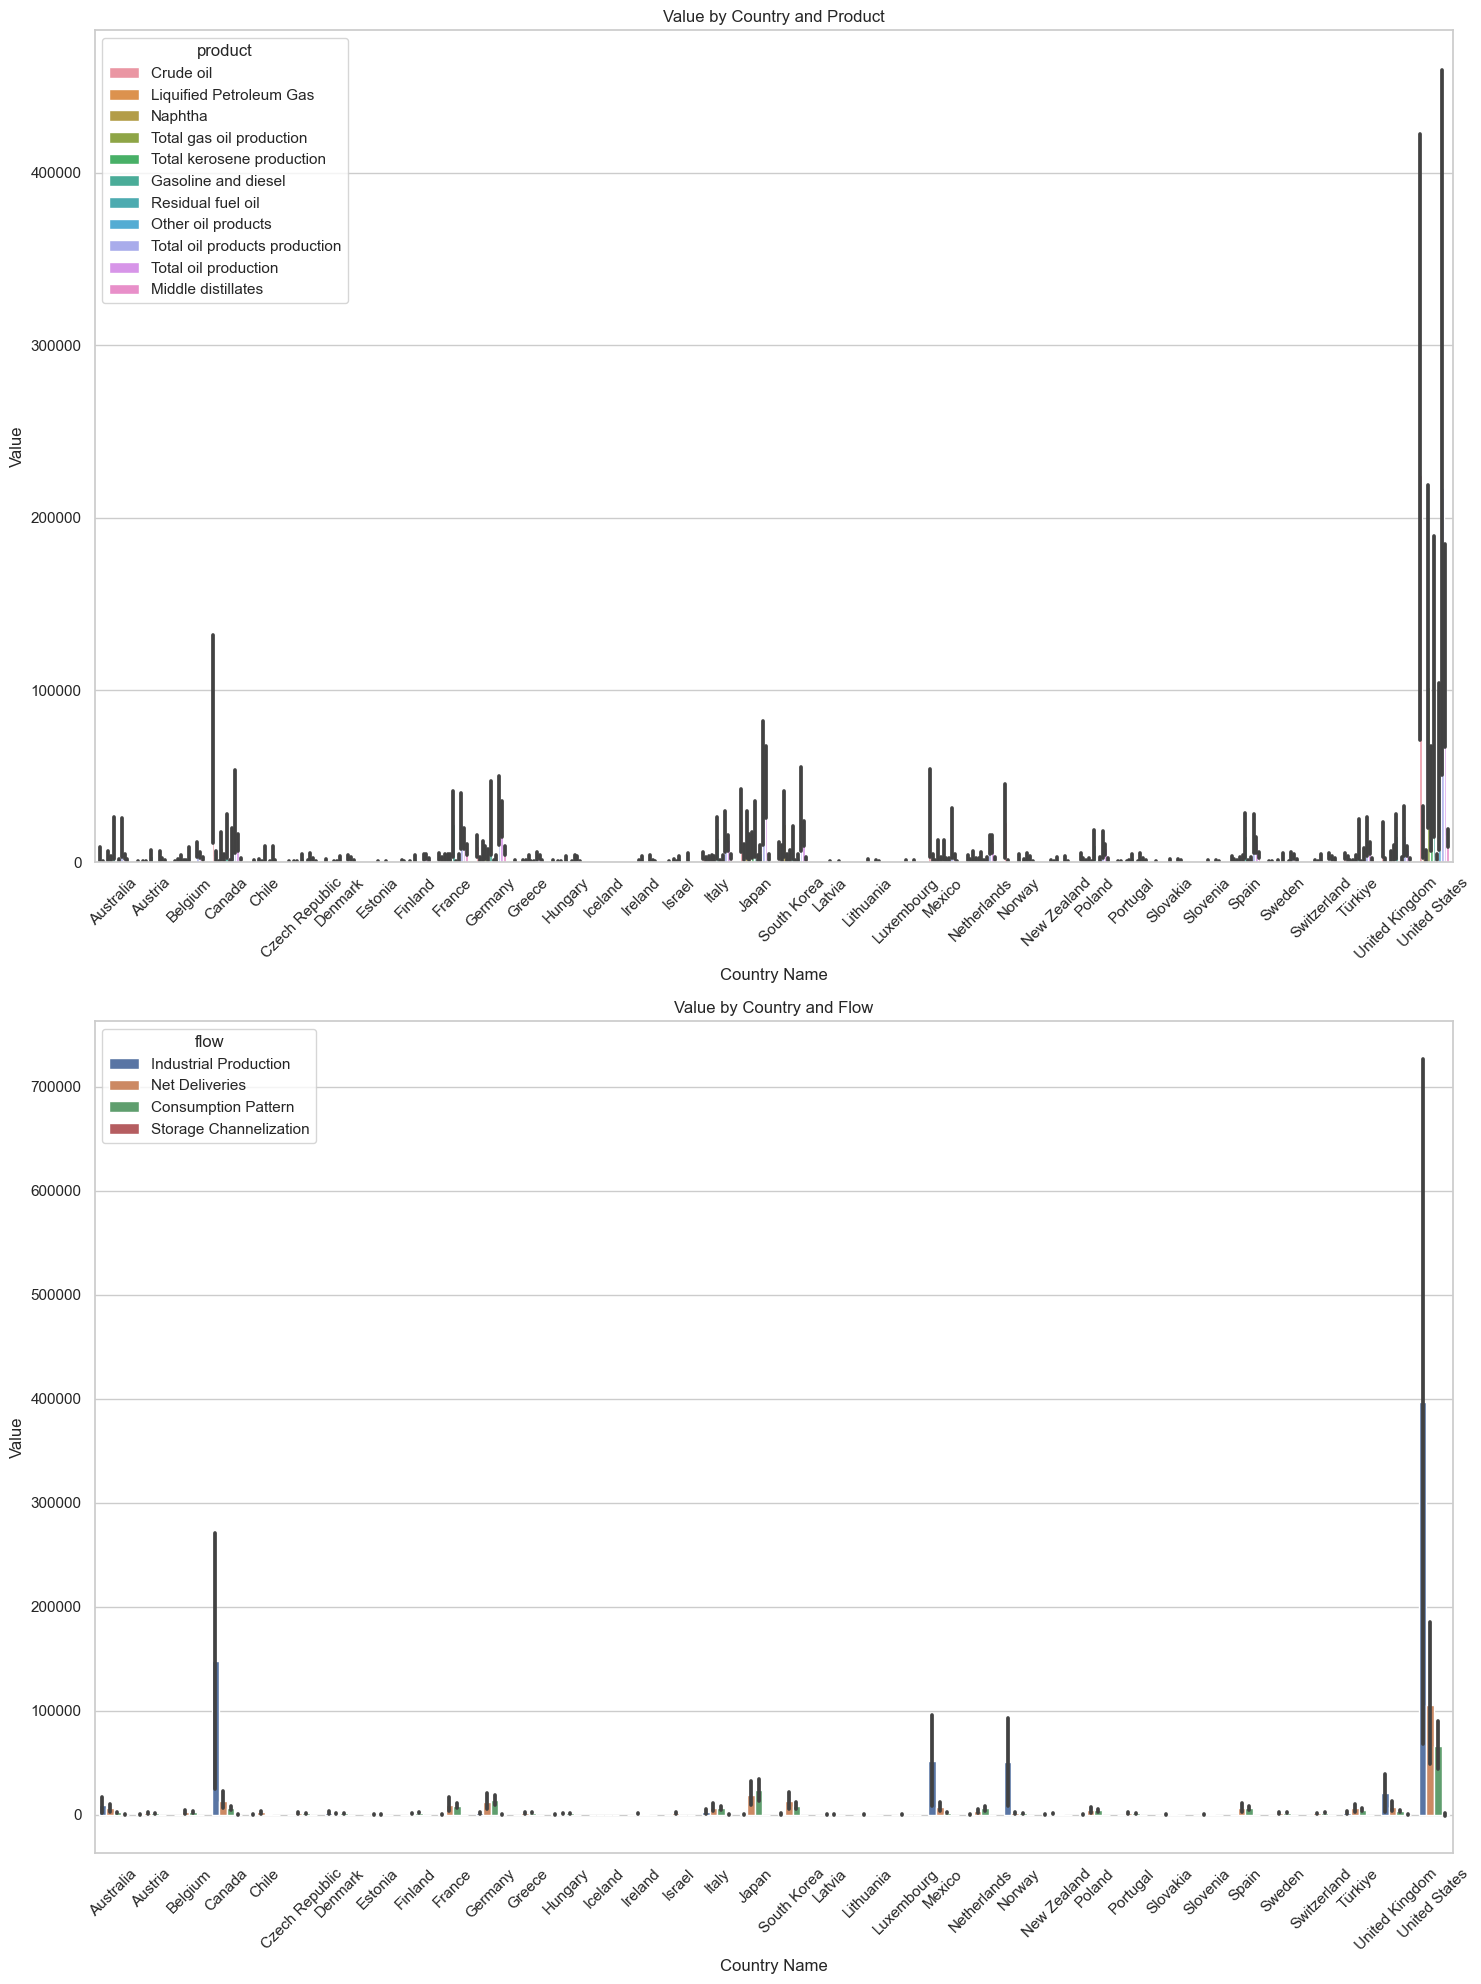

In [25]:
# Set the plot style
sns.set(style="whitegrid")

# Create a figure with two subplots (one for 'product' and one for 'flow')
fig, axes = plt.subplots(2, 1, figsize=(15, 20))

# Plot 1: Bar plot grouped by 'product'
sns.barplot(data=df, x='country_name', y='value', hue='product', ax=axes[0])
axes[0].set_title('Value by Country and Product')
axes[0].set_ylabel('Value')
axes[0].set_xlabel('Country Name')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Bar plot grouped by 'flow'
sns.barplot(data=df, x='country_name', y='value', hue='flow', ax=axes[1])
axes[1].set_title('Value by Country and Flow')
axes[1].set_ylabel('Value')
axes[1].set_xlabel('Country Name')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

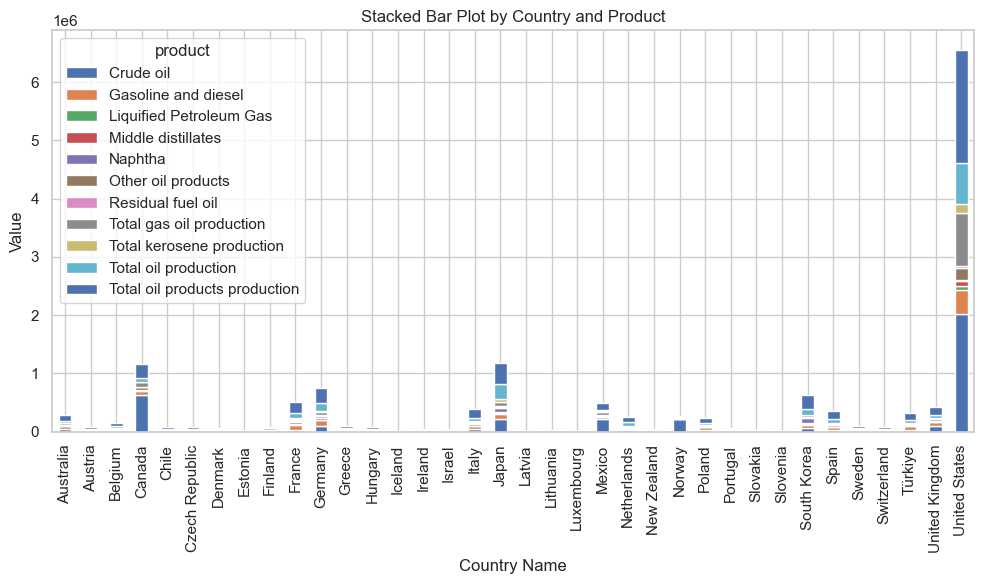

In [26]:
# Pivot the DataFrame to make the 'products' columns
df_pivot = df.pivot_table(index='country_name', columns='product', values='value', aggfunc='sum')

# Reset index for plotting
df_pivot = df_pivot.reset_index()

# Create a stacked bar plot using seaborn
df_pivot.set_index('country_name').plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Stacked Bar Plot by Country and Product')
plt.xlabel('Country Name')
plt.ylabel('Value')

# Show the plot
plt.tight_layout()
plt.show()

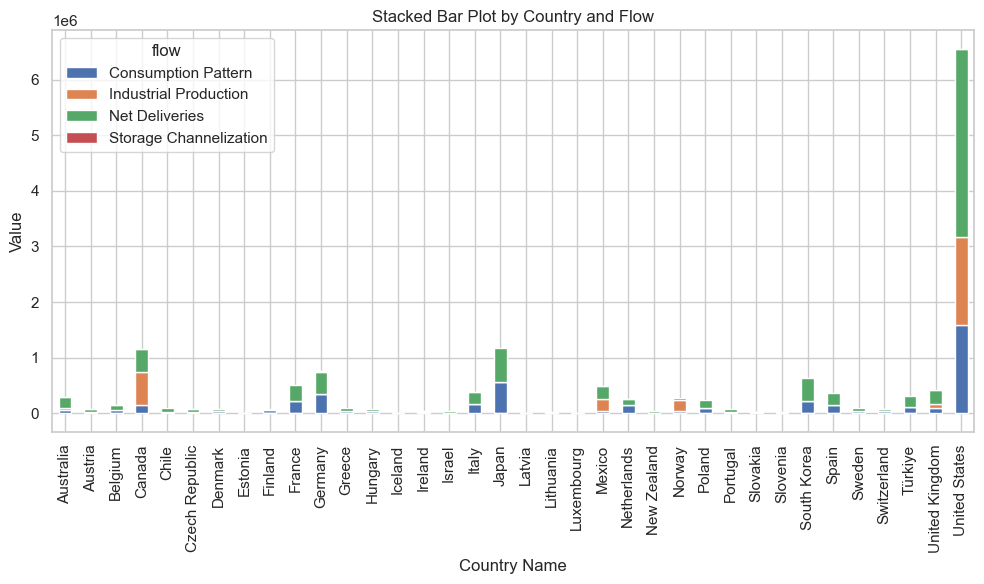

In [27]:
# Pivot the DataFrame to make the 'flow' columns
df_pivot = df.pivot_table(index='country_name', columns='flow', values='value', aggfunc='sum')

# Reset index for plotting
df_pivot = df_pivot.reset_index()

# Create a stacked bar plot using seaborn
df_pivot.set_index('country_name').plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Stacked Bar Plot by Country and Flow')
plt.xlabel('Country Name')
plt.ylabel('Value')

# Show the plot
plt.tight_layout()
plt.show()

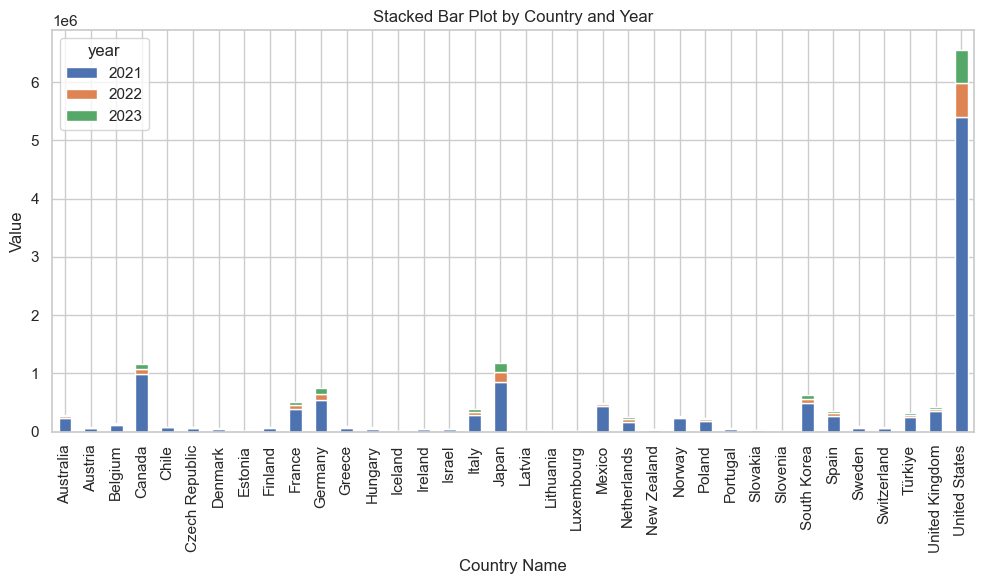

In [29]:
# Pivot the DataFrame to make the 'flow' columns
df_pivot = df.pivot_table(index='country_name', columns='year', values='value', aggfunc='sum')

# Reset index for plotting
df_pivot = df_pivot.reset_index()

# Create a stacked bar plot using seaborn
df_pivot.set_index('country_name').plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Stacked Bar Plot by Country and Year')
plt.xlabel('Country Name')
plt.ylabel('Value')

# Show the plot
plt.tight_layout()
plt.show()

## Assess production of other countries outside of U.S.

In [44]:
df_wo_us = df[df.country_name != 'United States']
#df_wo_us['United States']
df_wo_us.country_name.unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'South Korea', 'Latvia', 'Lithuania',
       'Luxembourg', 'Mexico', 'Netherlands', 'Norway', 'New Zealand',
       'Poland', 'Portugal', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Türkiye', 'United Kingdom'], dtype=object)

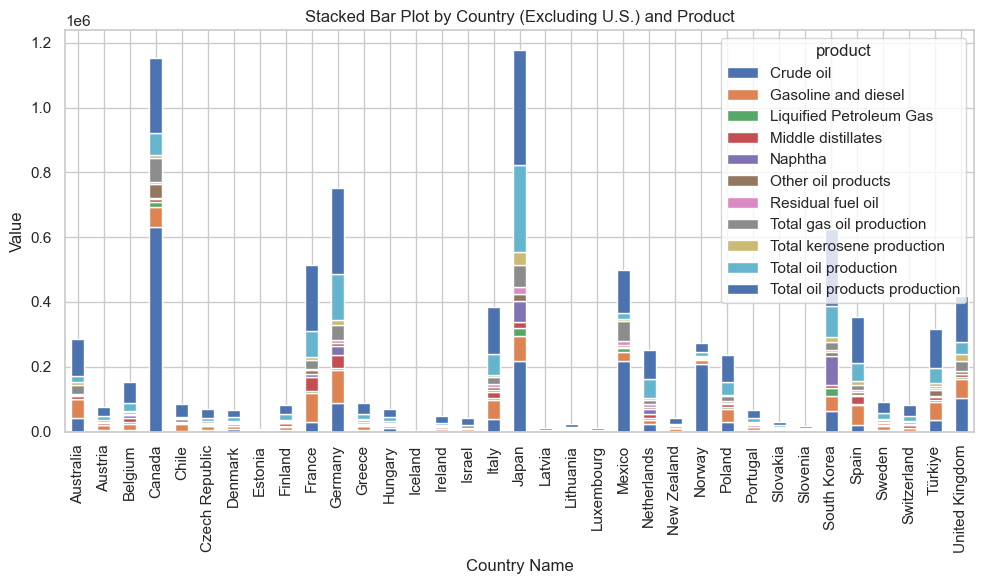

In [46]:
# Pivot the DataFrame to make the 'products' columns
df_wo_us_pivot = df_wo_us.pivot_table(index='country_name', columns='product', values='value', aggfunc='sum')

# Reset index for plotting
df_wo_us_pivot = df_wo_us_pivot.reset_index()

# Create a stacked bar plot using seaborn
df_wo_us_pivot.set_index('country_name').plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Stacked Bar Plot by Country (Excluding U.S.) and Product')
plt.xlabel('Country Name')
plt.ylabel('Value')

# Show the plot
plt.tight_layout()
plt.show()

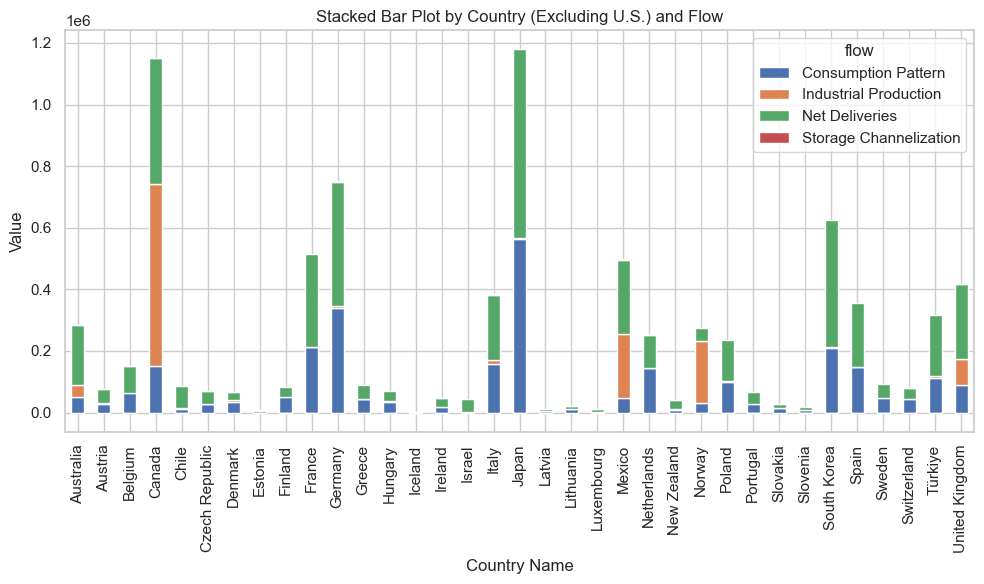

In [48]:
# Pivot the DataFrame to make the 'flow' columns
df_wo_us_pivot = df_wo_us.pivot_table(index='country_name', columns='flow', values='value', aggfunc='sum')

# Reset index for plotting
df_wo_us_pivot = df_wo_us_pivot.reset_index()

# Create a stacked bar plot using seaborn
df_wo_us_pivot.set_index('country_name').plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Stacked Bar Plot by Country (Excluding U.S.) and Flow')
plt.xlabel('Country Name')
plt.ylabel('Value')

# Show the plot
plt.tight_layout()
plt.show()

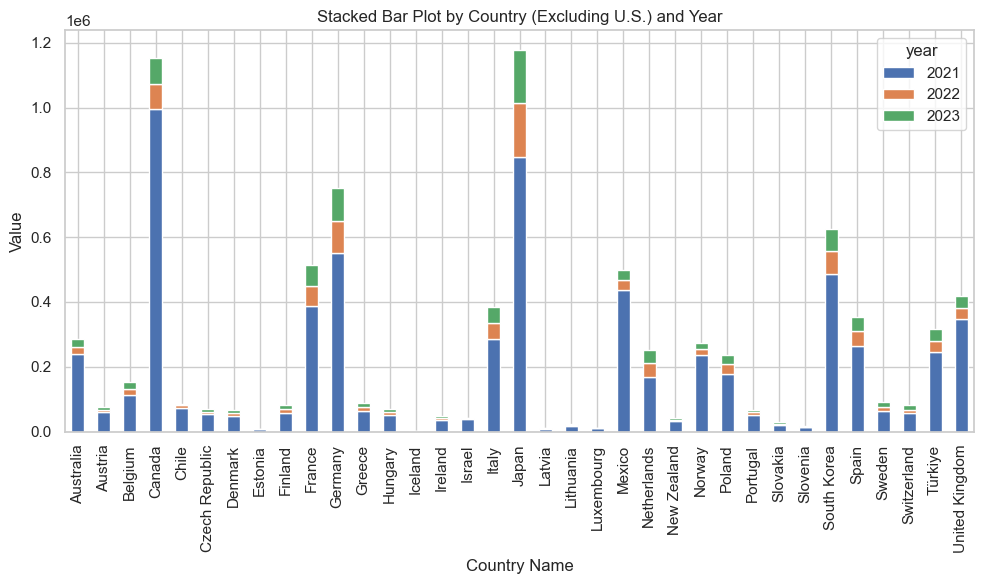

In [49]:
# Pivot the DataFrame to make the 'year' columns
df_wo_us_pivot = df_wo_us.pivot_table(index='country_name', columns='year', values='value', aggfunc='sum')

# Reset index for plotting
df_wo_us_pivot = df_wo_us_pivot.reset_index()

# Create a stacked bar plot using seaborn
df_wo_us_pivot.set_index('country_name').plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding labels and title
plt.title('Stacked Bar Plot by Country (Excluding U.S.) and Year')
plt.xlabel('Country Name')
plt.ylabel('Value')

# Show the plot
plt.tight_layout()
plt.show()

### 2. DATA RELATIONSHIPS

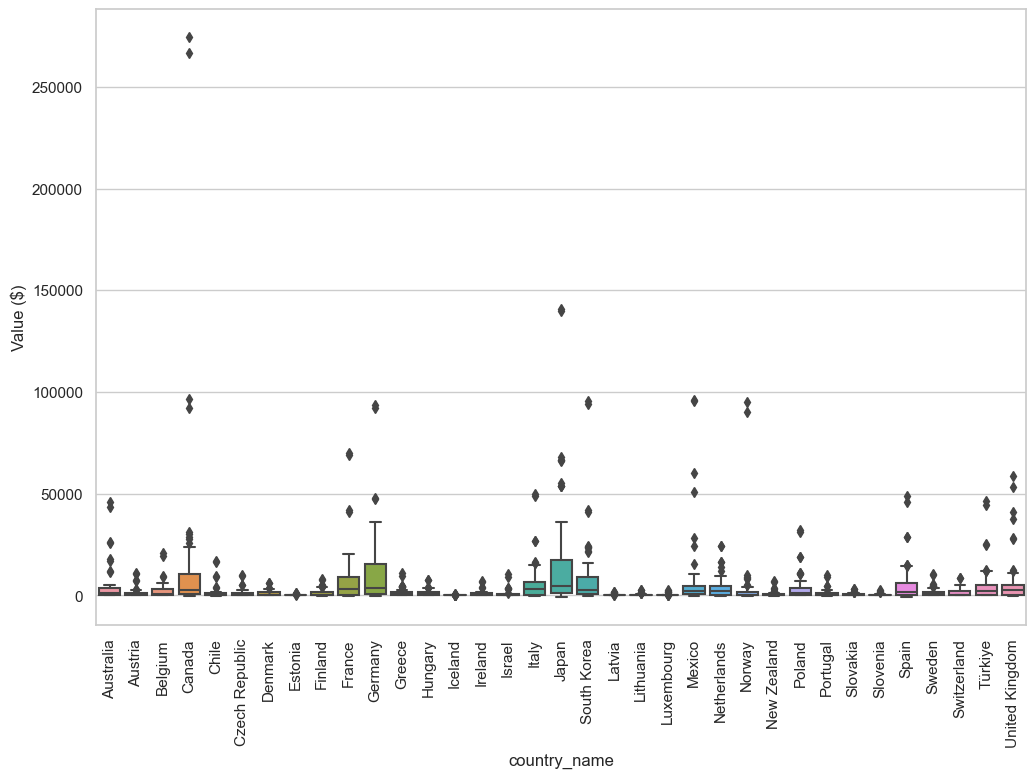

In [55]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='country_name', y='value', data=df_wo_us)
plt.xticks(rotation='vertical')
plt.ylabel('Value ($)')
plt.xlabel('country_name');

In [56]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 30)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.7, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'value', data=df, alpha=0.5)
        ax.set(xlabel=col, ylabel='Value')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [57]:
#Use a list comprehension to build a list of features from the columns of dataframe 
features = [x for x in df_wo_us.columns]


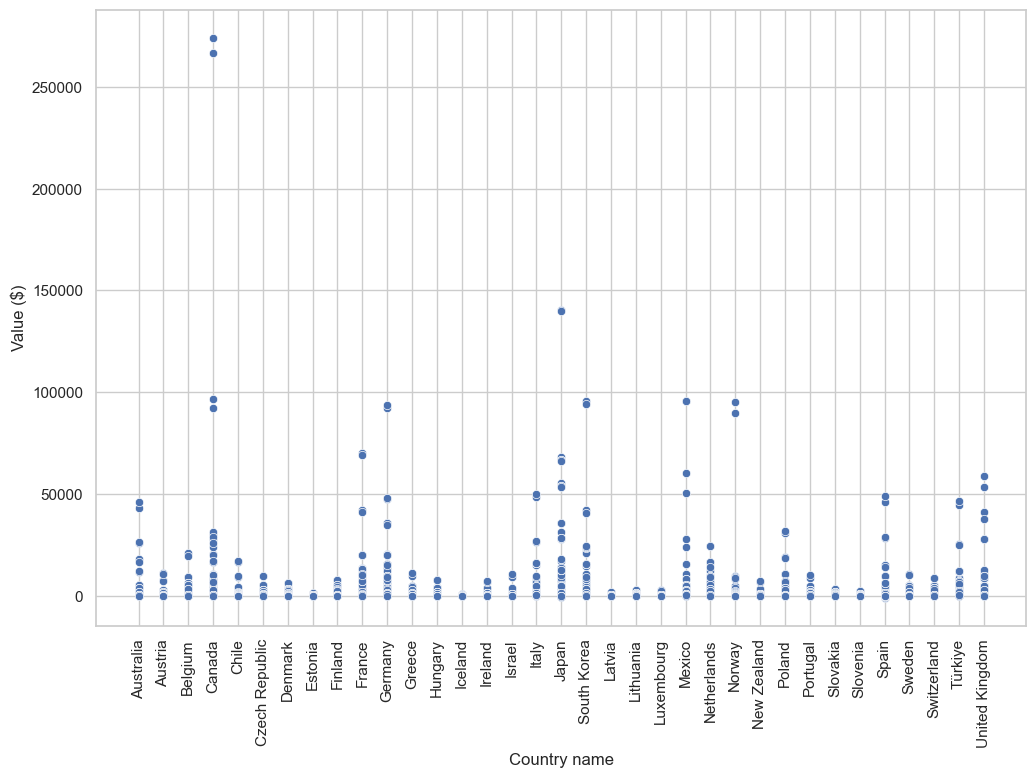

In [61]:
# Analyze housing prices by excluding zipcodes with several outliers
plt.subplots(figsize=(12, 8))
sns.scatterplot(x='country_name', y='value', data=df_wo_us)
plt.xticks(rotation='vertical')
plt.ylabel('Value ($)')
plt.xlabel('Country name');